In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
#set up palette and style used in plots
palette=  sns.color_palette("muted")#sns.palplot(sns.color_palette("hls", 8))#sns.diverging_palette(255, 133, l=60, n=7, center="dark")
sns.set_style("whitegrid",{"palette":palette} )

sns.set(palette=palette)

In [3]:
covid_19_data= pd.read_csv("novel_cv_2019/covid_19_data.csv")
covid_19_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## 1. What is the percentage of deaths from corona virus patients ?

In [4]:
percentage_of_death= (covid_19_data["Deaths"].sum()/covid_19_data["Confirmed"].sum())*100
print("{:.2f}% of COVID-19 patients died arround the world".format(percentage_of_death))

4.34% of COVID-19 patients died arround the world


In [5]:
covid_patients= covid_19_data["Confirmed"].sum() - covid_19_data["Deaths"].sum() - covid_19_data["Recovered"].sum()
covid_Deaths = covid_19_data["Deaths"].sum()
covid_recovered = covid_19_data["Recovered"].sum()

labels = 'COVID-19 patients', 'Deaths', 'Recovered'
sizes = [covid_patients, covid_Deaths, covid_recovered]
colors = ['#f1e7b6', '#fe346e','#00bdaa']
explode = (0, 0.1, 0)  # explode 1st slice

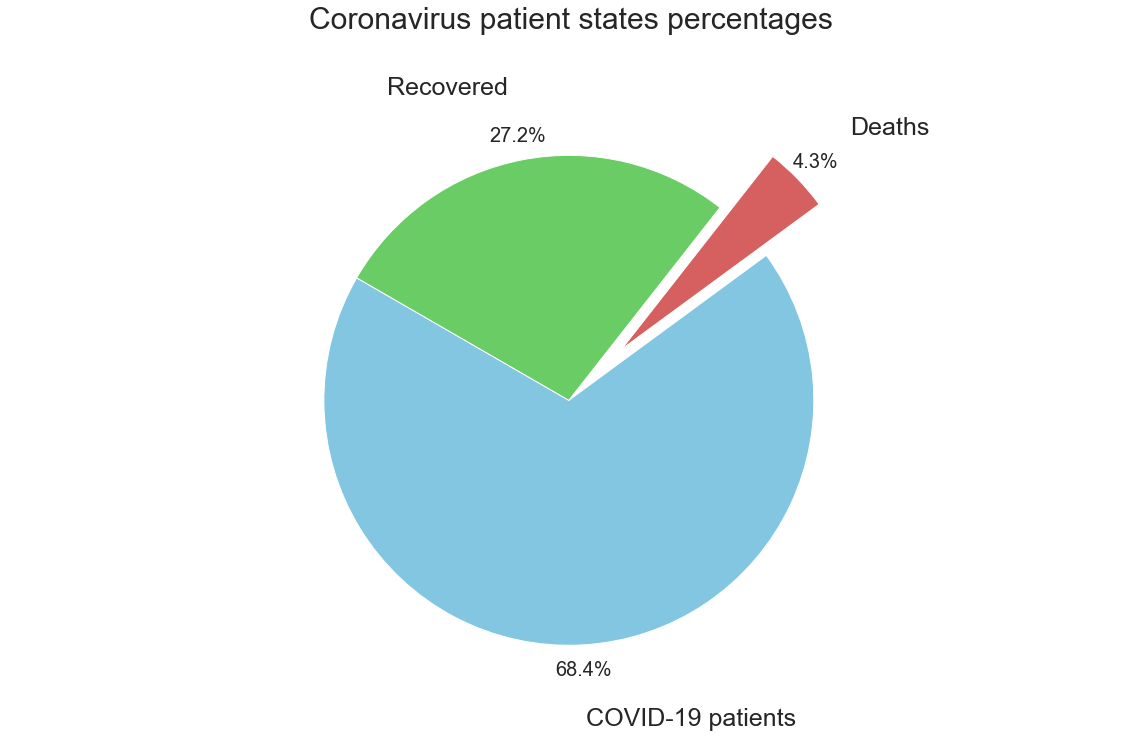

In [6]:
#mpl.style.use('ggplot')

plt.figure(figsize=(20,10))


#plt.style.use('ggplot')
covid_patients= covid_19_data["Confirmed"].sum() - covid_19_data["Deaths"].sum() - covid_19_data["Recovered"].sum()
covid_Deaths = covid_19_data["Deaths"].sum()
covid_recovered = covid_19_data["Recovered"].sum()

labels = 'COVID-19 patients', 'Deaths', 'Recovered'
sizes = [covid_patients, covid_Deaths, covid_recovered]
explode = (0, 0.3, 0)  # explode 1st slice
colors= [palette[9],palette[3],palette[2]]
# Plot

plt.title("Coronavirus patient states percentages", fontsize=30,pad=100)

patches, texts, autotexts= plt.pie(sizes,explode=explode, labels=labels,shadow=False , labeldistance=1.3,pctdistance=1.1,textprops={'fontsize': 20}, 
autopct='%1.1f%%', startangle=150,colors=colors, )

#set font size
fontsize=25
for text in texts:
    text.set_fontsize(fontsize)

plt.axis('equal')
plt.show()

#### Death rates per age group

In [7]:
age_df = pd.read_csv("DS4C/TimeAge.csv")
age_df.sort_values("date",inplace=True)
age_df.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [8]:
death_rate_per_age_group = age_df.groupby("age").sum()[["confirmed","deceased"]].reset_index()
death_rate_per_age_group["death_rate"]= np.around((death_rate_per_age_group["deceased"]/death_rate_per_age_group["confirmed"])*100, decimals=2)
death_rate_per_age_group

,age,confirmed,deceased,death_rate
0,0s,2323,0,0.00
1,10s,11733,0,0.00
2,20s,64417,0,0.00
3,30s,24071,29,0.12
4,40s,31760,29,0.09
5,50s,43718,196,0.45
6,60s,28661,432,1.51
7,70s,14412,802,5.56
8,80s,8276,922,11.14


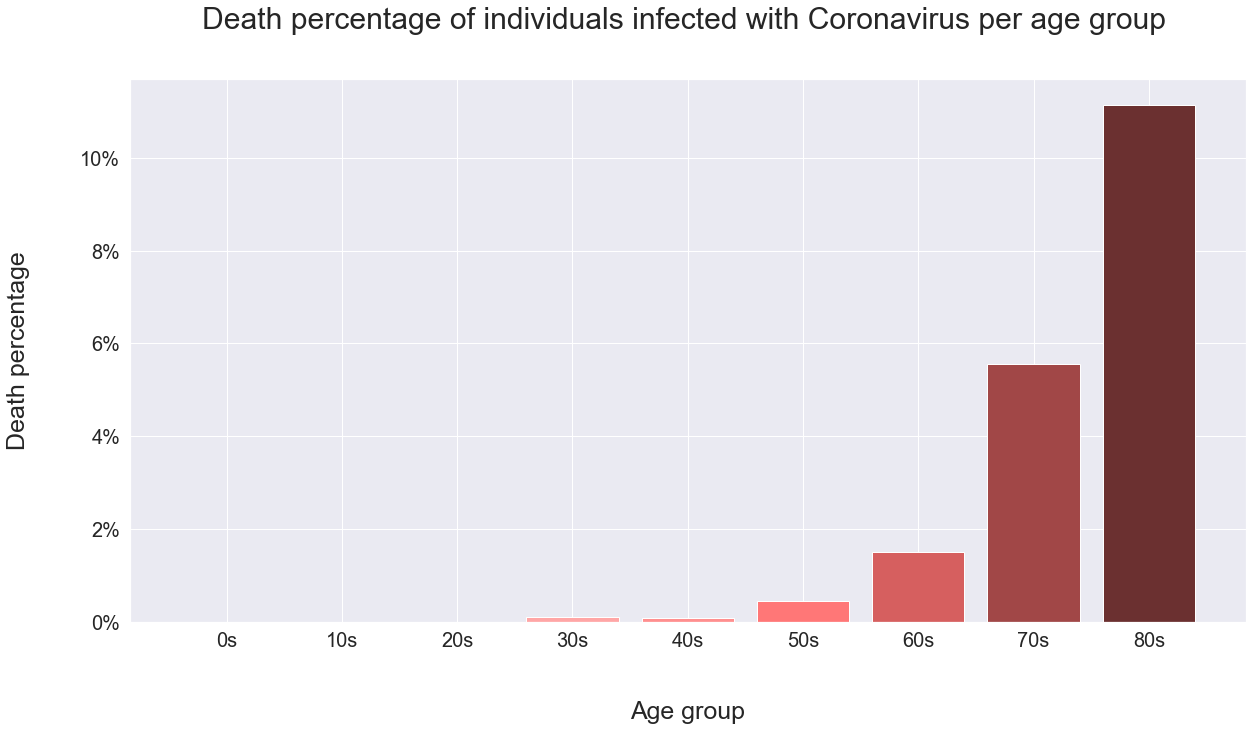

In [9]:
X = death_rate_per_age_group["age"]
Y = death_rate_per_age_group["death_rate"]

plt.figure(figsize=(20,10))

color_bar= np.clip([ (np.array(palette[3])*2)*(i*1/8) for i in range(death_rate_per_age_group.shape[0]+1,0,-1)],0,1 )
plt.bar(X,Y,color=color_bar)


plt.title("Death percentage of individuals infected with Coronavirus per age group ", fontsize=30,pad=50)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20, ticks=range(0,11,2), labels= [str(x)+"%" for x in range(0,11,2)])
plt.xlabel(xlabel="Age group" , fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel(ylabel="Death percentage" , fontsize=25, fontname="Sans",labelpad=50)

plt.show()

## Average Death time

In [10]:
death_time = pd.read_csv("DS4C/PatientInfo.csv")
death_time.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [11]:
death_time["country"].unique()

array(['Korea', 'China', 'United States', 'France', 'Thailand',
       'Switzerland', 'Mongolia'], dtype=object)

In [12]:
death_time.dropna(subset=["deceased_date"],inplace=True)
death_time['confirmed_date'] = pd.to_datetime(death_time['confirmed_date'])
death_time['deceased_date'] = pd.to_datetime(death_time['deceased_date'])

filtered = death_time[death_time["confirmed_date"] < death_time["deceased_date"]]

filtered['deceased_time'] = filtered['deceased_date'] - filtered['confirmed_date'] 


C:\Users\Abdullah\Anaconda3\envs\tensorflowEnv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


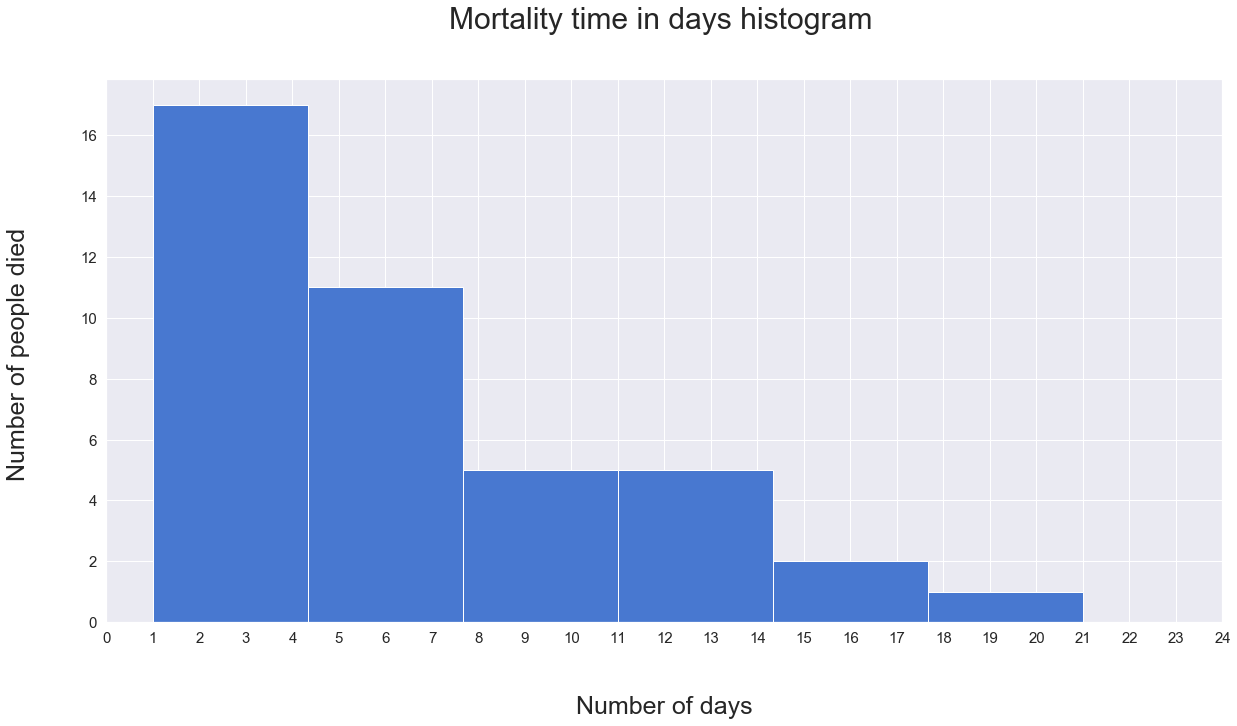

In [13]:
X = filtered['deceased_time'].apply(lambda x: x.days) 

plt.figure(figsize=(20,10))
plt.hist(X, bins=6)

plt.title("Mortality time in days histogram ", fontsize=30,pad=50)
plt.xlabel("Number of days", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("Number of people died ", fontsize=25, fontname="Sans",labelpad=50)

plt.xticks(fontsize=15,ticks=range(0,25))
plt.yticks(fontsize=15)

plt.show()

# 5. which countires have the highest number of death from corona ?

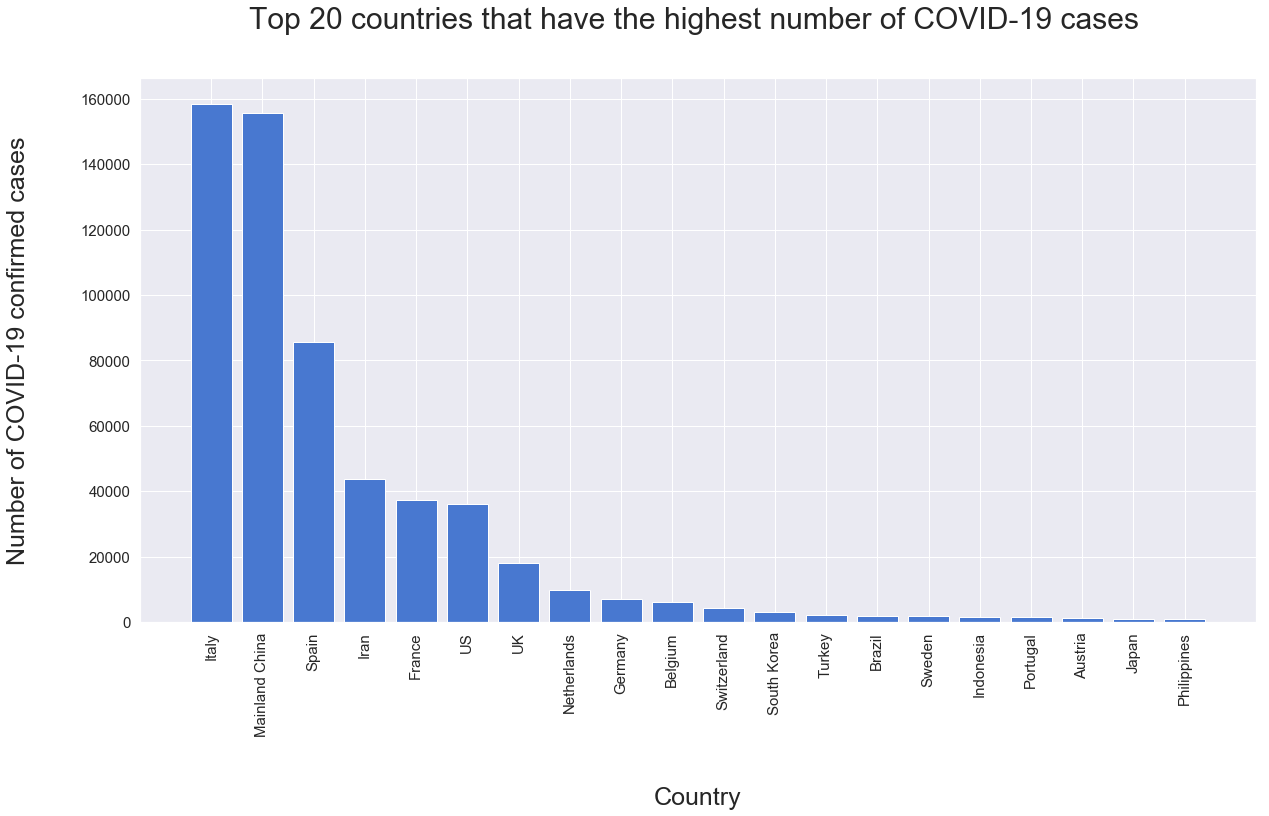

In [14]:
number_of_Death_by_country = covid_19_data.groupby("Country/Region").sum()["Deaths"].reset_index().sort_values("Deaths", ascending=False)
X= number_of_Death_by_country["Country/Region"][:20]
Y= number_of_Death_by_country["Deaths"][:20]

plt.figure(figsize=(20,10))
plt.bar(X,Y)



plt.title("Top 20 countries that have the highest number of COVID-19 cases ", fontsize=30,pad=50)

plt.xlabel("Country", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("Number of COVID-19 confirmed cases", fontsize=25, fontname="Sans",labelpad=50)

plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)



plt.show()


## 2. Is the spreading of Coronavirus  ?

In [15]:
spread_over_time = covid_19_data.groupby("ObservationDate").sum().sort_values("ObservationDate").reset_index()
spread_over_time.head()

,ObservationDate,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,741,555.0,17.0,28.0
1,01/23/2020,2829,653.0,18.0,30.0
2,01/24/2020,4305,941.0,26.0,36.0
3,01/25/2020,6490,1438.0,42.0,39.0
4,01/26/2020,9071,2118.0,56.0,52.0


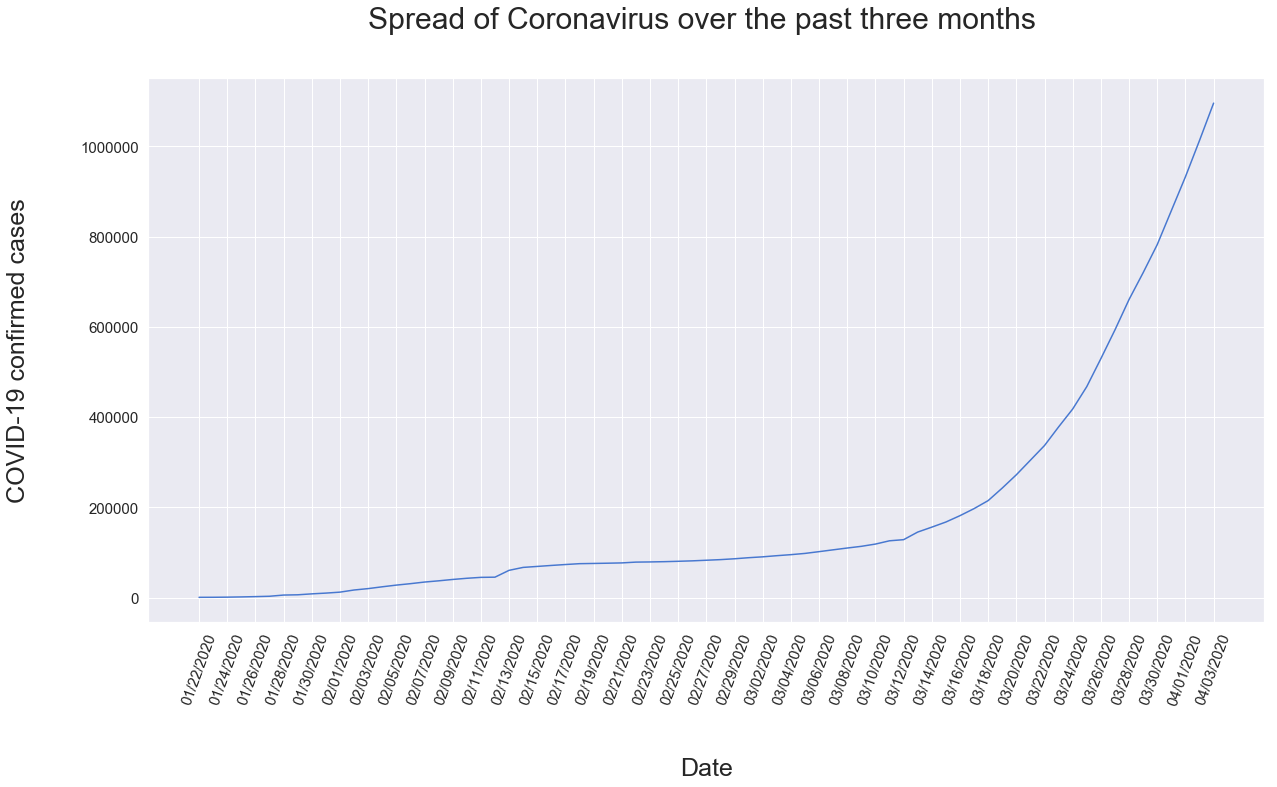

In [16]:
plt.figure(figsize=(20,10))
X = spread_over_time["ObservationDate"].tolist()
Y = spread_over_time["Confirmed"].tolist()

plt.plot(X,Y)
plt.xticks(fontsize=15, rotation=70, ticks=[X[i] for i in range(0,len(X),2)])
plt.yticks(fontsize=15)

plt.title("Spread of Coronavirus over the past three months ", fontsize=30,pad=50)


plt.xlabel("Date", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("COVID-19 confirmed cases", fontsize=25, fontname="Sans",labelpad=50)

plt.show()

Quarntien and precatunary actions looks like they are doing a great job from keeping COVID-19 from spreading. Before quarntien the spread looked like an exponential function. This looked disasterous. But after quarntien the graph plataued decreasing spread drastically. 

## 3.Which age group was infected with COVID-19 the most ?

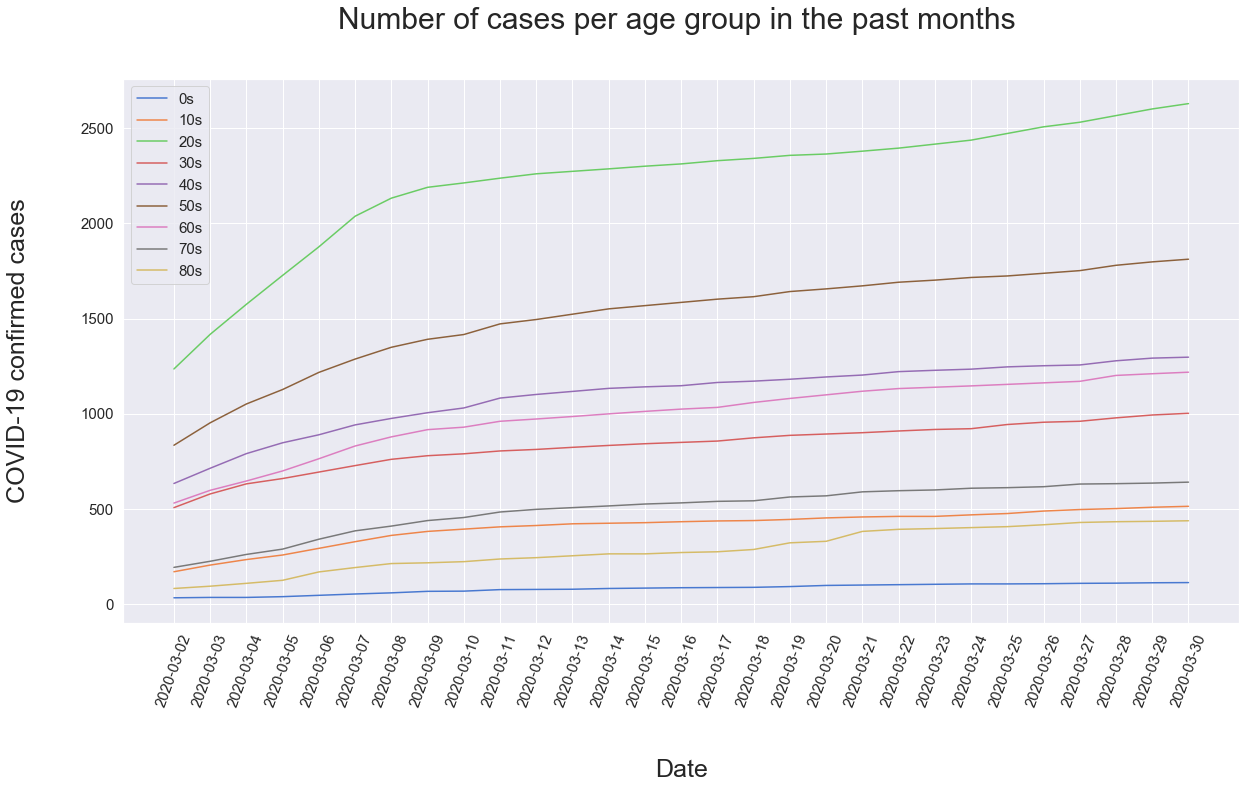

In [17]:
plt.figure(figsize=(20,10))

for age in age_df["age"].unique():
    filtered_age = age_df[age_df["age"]==age]
    X= filtered_age["date"]
    Y= filtered_age["confirmed"]
    
    plt.plot(X,Y,label=str(age))

plt.legend(fontsize=15)
plt.xticks(rotation=90)

plt.xticks(fontsize=15, rotation=70)
plt.yticks(fontsize=15)

plt.title("Number of cases per age group in the past months ", fontsize=30,pad=50)

plt.xlabel("Date", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("COVID-19 confirmed cases", fontsize=25, fontname="Sans",labelpad=50)

plt.show()

It looks like people in their 20s are the most people who gets affected by COVID-19. while little children between ages of 0 to 10 are the least that are getting affected. 

## 4. Average recovery time ?

In [18]:
recovery_time = pd.read_csv("DS4C/PatientInfo.csv")
recovery_time.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [19]:
recovery_time['confirmed_date'] = pd.to_datetime(recovery_time['confirmed_date'])
recovery_time['released_date'] = pd.to_datetime(recovery_time['released_date'])
recovery_time['deceased_date'] = pd.to_datetime(recovery_time['deceased_date'])

In [20]:
filtered= recovery_time[recovery_time['released_date'].isnull()==False]
filtered= recovery_time[recovery_time['released_date'] > recovery_time['confirmed_date']]

filtered.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaT,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaT,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaT,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaT,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaT,released


In [21]:
filtered['recovery_time'] = filtered['released_date']-filtered['confirmed_date']

C:\Users\Abdullah\Anaconda3\envs\tensorflowEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
filtered['recovery_time'] = filtered['recovery_time'].apply(lambda x : x.days)

C:\Users\Abdullah\Anaconda3\envs\tensorflowEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
filtered['recovery_time'].mean()

18.439265536723163

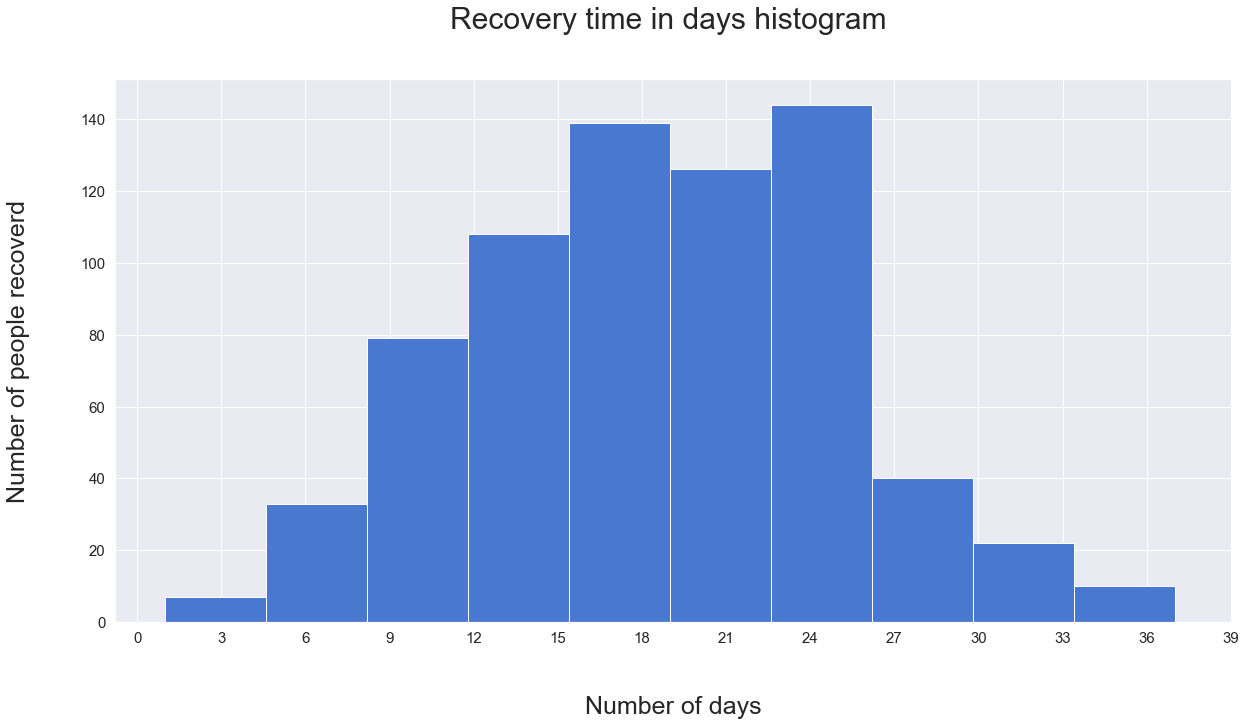

In [24]:
X = filtered['recovery_time']

plt.figure(figsize=(20,10))
plt.hist(X)
plt.xticks(ticks=range(0,40,3))


plt.title("Recovery time in days histogram ", fontsize=30,pad=50)
plt.xlabel("Number of days", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("Number of people recoverd", fontsize=25, fontname="Sans",labelpad=50)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

### Average recovery time per age group?

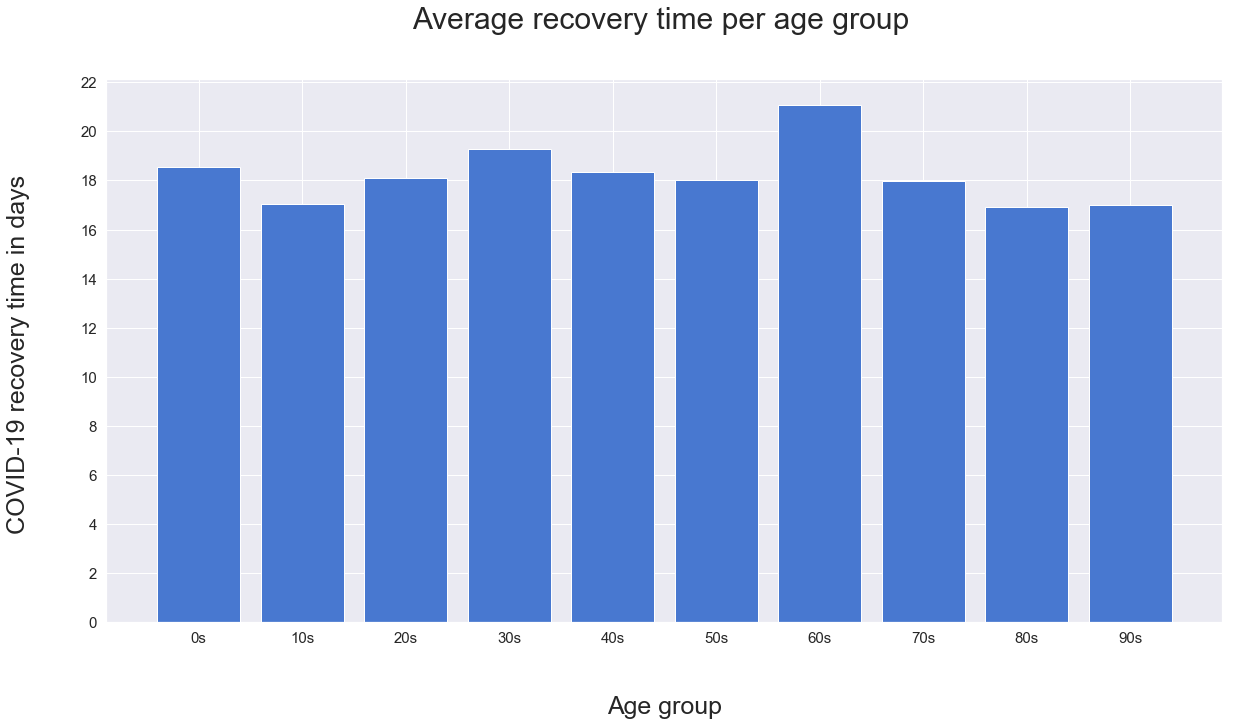

In [25]:
recovery_time_per_age = filtered.groupby("age").mean()["recovery_time"].reset_index()

X = recovery_time_per_age["age"]
Y = recovery_time_per_age["recovery_time"]

plt.figure(figsize=(20,10))

plt.title("Average recovery time per age group ", fontsize=30,pad=50)

plt.xlabel("Age group", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("COVID-19 recovery time in days ", fontsize=25, fontname="Sans",labelpad=50)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15, ticks=range(0,25,2))

plt.bar(X,Y)
plt.show()

> The data does not show that there is much difference in recovery time between age groups

# 6. which countries have the highest number of recoveries from COVID-19 ?

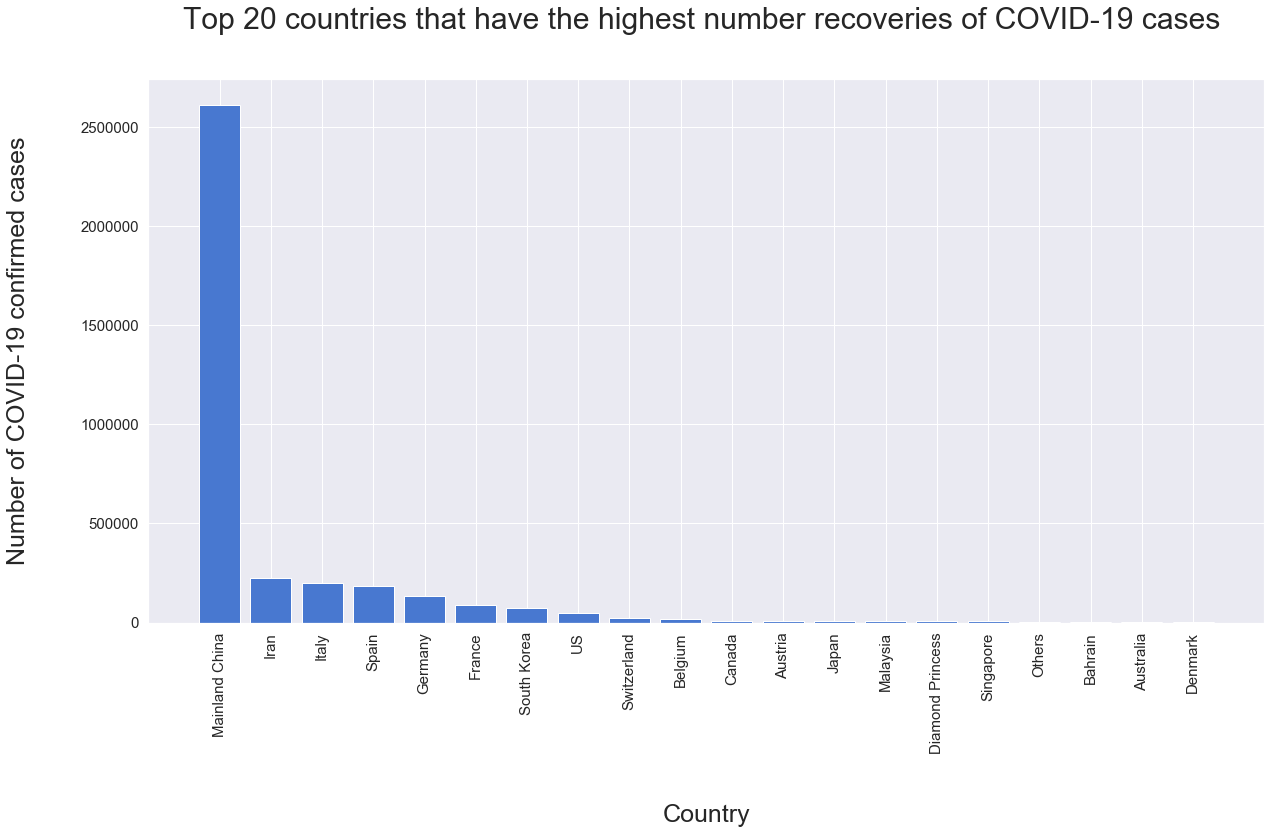

In [26]:
number_of_recoverd_by_country = covid_19_data.groupby("Country/Region").sum()[["Recovered","Confirmed"]].reset_index().sort_values("Recovered", ascending=False)
X= number_of_recoverd_by_country["Country/Region"][:20]
Y= number_of_recoverd_by_country["Recovered"][:20]

plt.figure(figsize=(20,10))
plt.bar(X,Y)
plt.title("Top 20 countries that have the highest number recoveries of COVID-19 cases ", fontsize=30,pad=50)

plt.xlabel("Country", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("Number of COVID-19 confirmed cases", fontsize=25, fontname="Sans",labelpad=50)

plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)




plt.show()